# Tutorial 5: Chromaticity correction and non-linearities

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Launching MAD-X

In [2]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.18 20:35:58      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Questions

#### 1. Install two 0.5 m long sextupoles attached to the two quadrupoles. With a MAD-X matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles. 

#### In order to install the sextupoles in the lattice, first define the new element with the appropriate MAD-X command:

        sm : sextupole, k2 = ??, l = ??; 

#### Then, introduce them into the sequence description block:

        s1 : sm, at = ??; 
        
#### Then, with a MAD-X matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles. 

In [3]:
madx.call("Tutorial5_solutions.madx")

! ****************************************************************************

! Adding sextupoles to the Tutorial 4 lattice

! In order to run this lattice, you need complete some lines, watch out the question marks!

! ****************************************************************************

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;



!! Quadrupole Parameters

quadrupoleLength=5;

myKF=2.8/l_cell/quadrupoleLength;

myKD:=-2.8/l_cell/quadrupoleLength;



!! Dipole Parameters

nBend=736;

dipoleLength=15;

myAngle:=2*pi/nBend;



!! Sextupole Parameters

k2f = 0;

k2d := -k2f;

sextupoleLength = 0.5;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



QF: quadrupole, L=quadrupoleLength, K1:=myKF;

QD: quadrupole, 

#### Saving the data for the Non Zero Chomaticity lattice 

In [4]:
thinNonZeroChromaSUMMTable=madx.table['summ'].dframe()
print(thinNonZeroChromaSUMMTable["dq1"])

#e   -0.31808
Name: dq1, dtype: float64


In [5]:
thinNonZeroChromaTWISSTable=madx.table['AfterMatching'].dframe()

In [6]:
thinNonZeroChromaTWISSTable.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.000,162.551655,-2.393522,0.000000,30.941574,0.530646,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,0.625,165.559728,-2.419395,0.000606,30.294445,0.504759,0.003249,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1..1,q1..1:1,multipole,0.625,165.559728,-0.803954,0.000606,30.294445,0.209163,0.003249,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,2.500,168.609516,-0.822599,0.002392,29.631211,0.144563,0.013216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,marker,2.500,168.609516,-0.822599,0.002392,29.631211,0.144563,0.013216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
thinNonZeroChromaTWISSTable_test=thinNonZeroChromaTWISSTable[thinNonZeroChromaTWISSTable['keyword']=='multipole']
thinNonZeroChromaTWISSTable_test.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
q1..1,q1..1:1,multipole,0.6250,165.559728,-0.803954,0.000606,30.294445,0.209163,0.003249,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1..2,q1..2:1,multipole,2.5000,168.609516,0.822599,0.002392,29.631211,-0.144563,0.013216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1..3,q1..3:1,multipole,4.3750,165.559728,2.419395,0.004179,30.294445,-0.504759,0.023183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s1..1,s1..1:1,multipole,5.0625,162.252627,2.390935,0.004846,31.008067,-0.533235,0.026753,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s1..2,s1..2:1,multipole,5.2500,161.357481,2.383173,0.005031,31.209486,-0.541001,0.027712,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#pd.set_option('display.max_columns', None)
#thinNonZeroChromaTWISSTable_test=thinNonZeroChromaTWISSTable[thinNonZeroChromaTWISSTable['keyword']=='multipole']
#thinNonZeroChromaTWISSTable_test.k0l

/Users/nuria/Desktop/JUAS2024/Tutorial5/../lib_JUAS2024.py:68: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(-np.max(abs(myDF.angle)),np.max(abs(myDF.angle)))


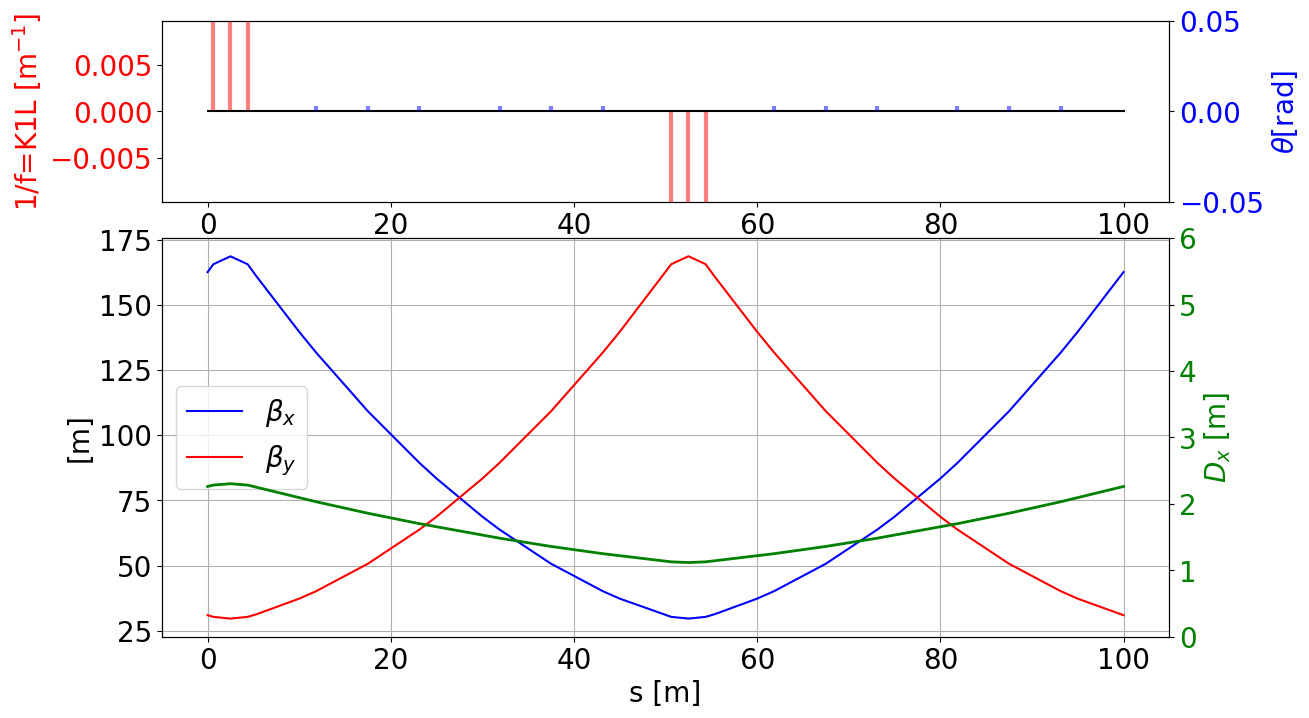

In [9]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(thinNonZeroChromaTWISSTable)

#### Now, we can perform the matching for chromaticity correction


In [10]:
myString='''

//*************************************************//
!   MATCHING OF THE CHROMATICITY
//*************************************************//
match, sequence=myCell;
global, dq1=0.0;
global, dq2=0.0;
vary, name=k2f, step=0.00001;
vary, name=k2d, step=0.00001;
lmdif, calls=50, tolerance=1e-6;
endmatch;

'''

In [11]:
madx.input(myString)

START MATCHING

number of sequences: 1
sequence name: mycell
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.20238500E+00


call:       4   Penalty function =   0.98387866E-26
 ++++++++++ LMDIF ended: converged successfully
call:       4   Penalty function =   0.98387866E-26

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         dq1          4     0.00000000E+00    -9.88799111E-14     9.77723682E-27
Global constraint:         dq2          4     0.00000000E+00    -7.84536821E-15     6.15498024E-29


Final Penalty Function =   9.83878662e-27





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------------------------------------------------------------
k2f                       2.72614e-

True

In [12]:
myString='''
//*************************************************//
!   TWISS
//*************************************************//
SELECT,FLAG=TWISS, column=name,s,betx,bety,dx,K1L,K2L;
twiss,file="twiss_after_chroma_correction.txt";
'''

In [13]:
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0005511962419        42.59384793 

                q1                dq1            betxmax              dxmax 
      0.2500001236    -9.88799111e-14        168.6095162        2.303523542 

             dxrms             xcomax             xcorms                 q2 
       1.729568871                  0                  0       0.2500001249 

               dq2            betymax              dymax              dyrms 
  -7.845368214e-15        168.6347433                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

#### Saving the TWISS output after the zero chromaticity matching

In [14]:
thinZeroChromaDFTable=madx.table['twiss'].dframe()

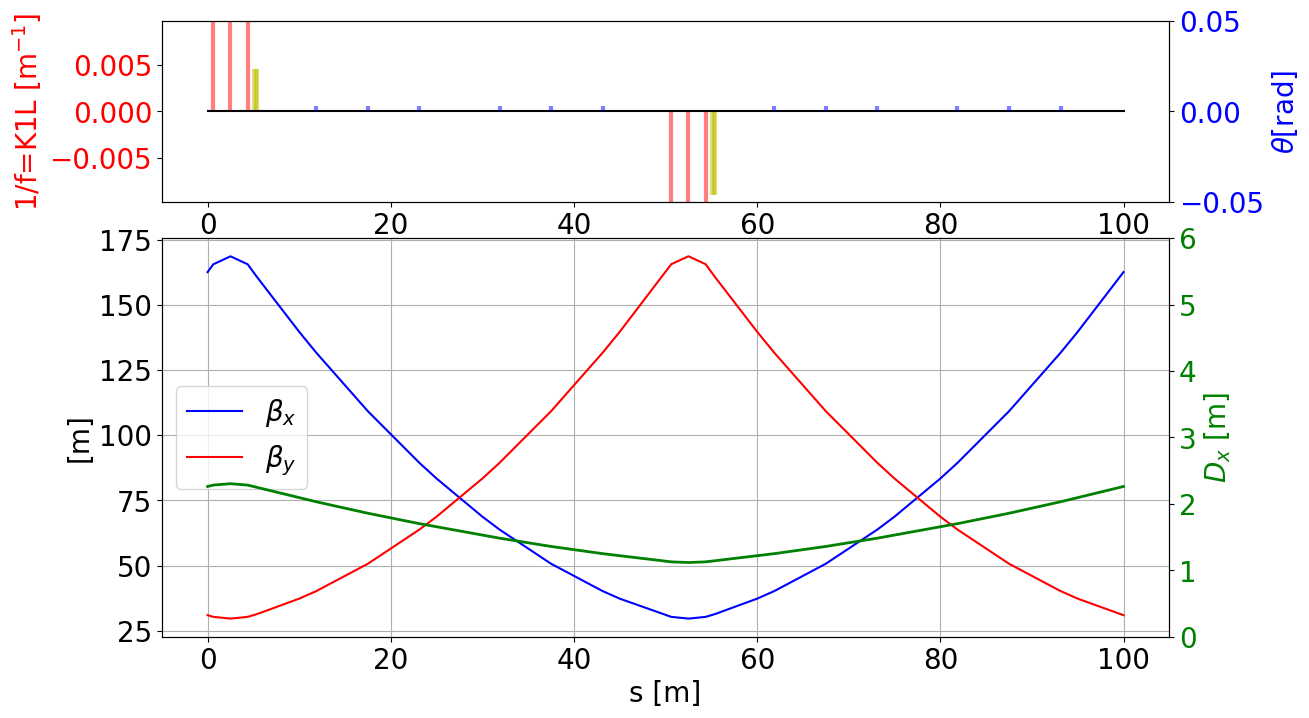

In [15]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(thinZeroChromaDFTable)

#### 2. Using the strength of the sextupoles and the linear optics functions ($\beta$-function and dispersion) at the sextupole' location, evaluate the sextupole's contribution to the chromaticity on the horizontal plane using the following equation: 

$\xi = \frac{1}{4*\pi}*(\beta_{x,S1}*K2_1*Dx_{S1}+\beta_{x,S2}*K2_2*Dx_{S2})$

#### Selecting the sextupoles' parameters of interest

In [16]:
sextupoles=thinZeroChromaDFTable[thinZeroChromaDFTable['k2l']!=0]
sextupoles[['name','s','betx','dx','k2l']]

,name,s,betx,dx,k2l
s1..1,s1..1:1,5.0625,162.252627,2.259414,0.004544
s1..2,s1..2:1,5.2500,161.357481,2.253131,0.004544
s1..3,s1..3:1,5.4375,160.465247,2.246848,0.004544
s2..1,s2..1:1,55.0625,31.007560,1.138404,-0.008968
s2..2,s2..2:1,55.2500,31.209022,1.141489,-0.008968
s2..3,s2..3:1,55.4375,31.413398,1.144573,-0.008968


#### Computatio of the sextupoles' contribution to the chromaticity

In [17]:
aux=thinZeroChromaDFTable
(aux['betx']*aux['dx']*1*aux['k2l']).sum()/4./np.pi

0.31808013281868197

#### To be compared with dq1 before compensation

In [18]:
print("dq1")
thinNonZeroChromaSUMMTable["dq1"]

dq1


#e   -0.31808
Name: dq1, dtype: float64

#### Very good compensation!

#### 3. Track two particles, one with initial coordinates x, y, px, py = (1 mm, 1 mm, 0, 0) and another one with initial coordinates x, y, px, py = (100 mm, 100 mm, 0, 0) and both with $\Delta p/p = 0.01$ for 100 turns. Plot the horizontal and vertical phase space, x-px and y-py respectively. Did you manage to recover the original tune for the off-momentum particle from Tutorial 4? Do you see the tunes? What is going on?

In [19]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='withSextupoles', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;
'''

In [20]:
madx.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.200895E-02 deltap:   1.000000E-02
orbit:   2.284846E-02  3.351908E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   5.404118E-04 deltap:   1.000000E-02
orbit:   2.258535E-02  3.330205E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   6.992528E-08 deltap:   1.000000E-02
orbit:   2.258531E-02  3.330202E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100     0.001003902583    7.100545402e-08 
         2        100                nan                nan 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.00999999991

In [21]:
print(list(madx.table))

['summ', 'twiss', 'beforematching', 'aftermatching', 'mytracksumm', 'tracksumm', 'track.obs0001.p0001', 'track.obs0001.p0002']


#### Saving the output data of the tracking for each particle

In [22]:
off_momentum_nonlinear_particle_1=madx.table['track.obs0001.p0001'].dframe()
off_momentum_nonlinear_particle_2=madx.table['track.obs0001.p0002'].dframe()

#### Horizontal phase space plot for the **small initial condition amplitude**

Text(0.5, 1.0, 'Particle 2')

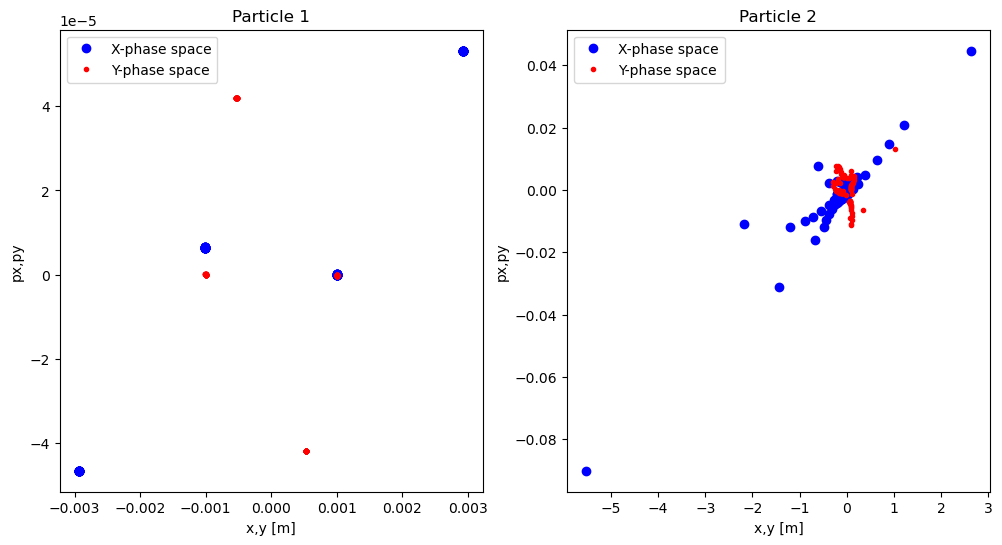

In [23]:
plt.rcParams['figure.dpi'] = 100

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
ax1.plot(off_momentum_nonlinear_particle_1['x'],off_momentum_nonlinear_particle_1['px'],'ob',label='X-phase space')
ax1.plot(off_momentum_nonlinear_particle_1['y'],off_momentum_nonlinear_particle_1['py'],'.r',label='Y-phase space')
ax1.set_xlabel('x,y [m]')
ax1.set_ylabel('px,py')
ax1.set_title('Particle 1')
ax1.legend()


ax2.plot(off_momentum_nonlinear_particle_2['x'],off_momentum_nonlinear_particle_2['px'],'ob',label='X-phase space')
ax2.plot(off_momentum_nonlinear_particle_2['y'],off_momentum_nonlinear_particle_2['py'],'.r',label='Y-phase space')
ax2.set_xlabel('x,y [m]')
ax2.set_ylabel('px,py')
ax2.legend()
ax2.set_title('Particle 2')

#### But for larger amplitudes...
#### What is the cost of increasing the energy acceptance...? A decrease in transverse acceptance.

#### Particles with large amplitude are not stable anymore due to the non-linear EM fields.

#### We can again plot the amplitude vs the turn number

(-2.0, 2.0)

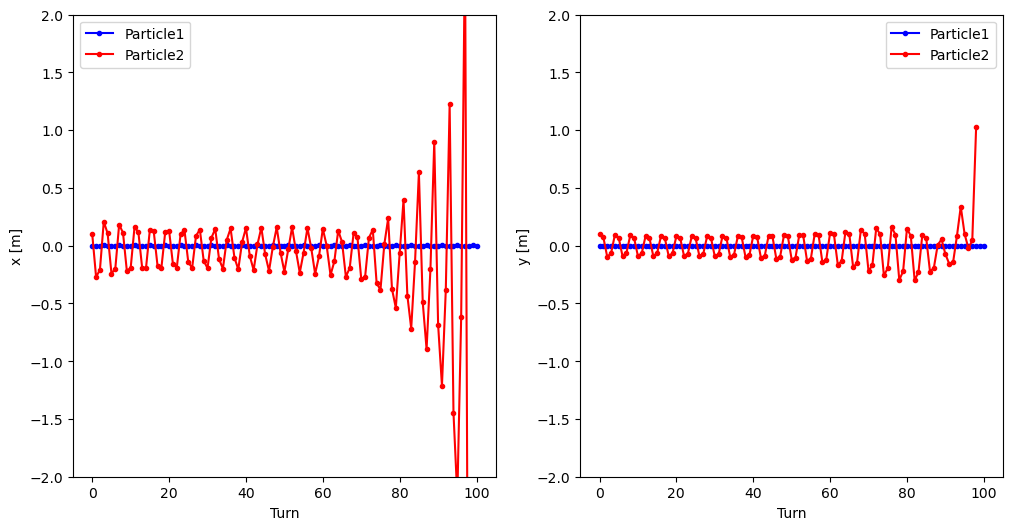

In [24]:
plt.rcParams['figure.dpi'] = 100
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
ax1.plot(off_momentum_nonlinear_particle_1['turn'],off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle1')
ax1.plot(off_momentum_nonlinear_particle_2['turn'],off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle2' )
ax1.set_xlabel('Turn')
ax1.set_ylabel('x [m]')
ax1.legend(loc='best')
ax1.set_ylim(-2,2)

ax2.plot(off_momentum_nonlinear_particle_1['turn'],off_momentum_nonlinear_particle_1['y'],'.-b', label='Particle1')
ax2.plot(off_momentum_nonlinear_particle_2['turn'],off_momentum_nonlinear_particle_2['y'],'.-r', label='Particle2' )
ax2.set_xlabel('Turn')
ax2.set_ylabel('y [m]')
ax2.legend(loc='best')
ax2.set_ylim(-2,2)
#plt.grid()

#### 4. Move the tunes to (0.23, 0.23) and repeat the tracking exercise. Are the particles stable?

#### Firts we move the tune of the FODO to 0.23

In [25]:
myString='''
//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//

match, sequence=myCell;
global, Q1=0.23;
global, Q2=0.23;
vary,name=mykf,step=0.0001;
vary,name=mykd,step=0.0001;
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;

'''
madx.input(myString);

START MATCHING

number of sequences: 1
sequence name: mycell
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.80000994E-01


call:       4   Penalty function =   0.67251293E-04
call:       7   Penalty function =   0.43474114E-10
call:      10   Penalty function =   0.16445309E-19
 ++++++++++ LMDIF ended: converged successfully
call:      10   Penalty function =   0.16445309E-19

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     2.30000000E-01     2.30000000E-01     7.37688529E-21
Global constraint:         q2           4     2.30000000E-01     2.30000000E-01     9.06842335E-21


Final Penalty Function =   1.64453086e-20





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
------------

#### Then, we adjust the sextupoles' to correct the chromaticity

In [26]:
myString='''

!*************************************************
!   MATCHING OF THE CHROMATICITY
!*************************************************

match, sequence=myCell;
global, dq1=0.0; 
global, dq2=0.0;
vary,name=K2F,step=0.0001;
vary,name=K2D,step=0.0001;
LMDIF, calls = 100, tolerance=1E-12;
endmatch;

'''
madx.input(myString);

START MATCHING

number of sequences: 1
sequence name: mycell
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.88856291E-02


call:       4   Penalty function =   0.11607029E-24
 ++++++++++ LMDIF ended: converged successfully
call:       4   Penalty function =   0.11607029E-24

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         dq1          4     0.00000000E+00     2.75879795E-13     7.61096611E-26
Global constraint:         dq2          4     0.00000000E+00     1.99901537E-13     3.99606247E-26


Final Penalty Function =   1.16070286e-25





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------------------------------------------------------------
k2f                       2.26489e-

#### And we are ready to repeat the tracking of the two particles

In [27]:
myString='''
!*************************************************
!   TRACKING
!*************************************************

track,dump, DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;

'''
madx.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.161313E-02 deltap:   1.000000E-02
orbit:   2.571525E-02  3.525073E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   5.440982E-04 deltap:   1.000000E-02
orbit:   2.541875E-02  3.502228E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   7.238576E-08 deltap:   1.000000E-02
orbit:   2.541871E-02  3.502224E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100     0.001004269297    6.873868617e-08 
         2        100        0.172573769     0.001450801021 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.00999999991

#### Saving the TRACK output data for each particle in a different pandas dataframe

In [28]:
optWP_off_momentum_nonlinear_particle_1=madx.table['track.obs0001.p0001'].dframe()
optWP_off_momentum_nonlinear_particle_2=madx.table['track.obs0001.p0002'].dframe()

#### Horizontal phase space plot for the large initial condition amplitude

Text(0.5, 1.0, 'Particle 2')

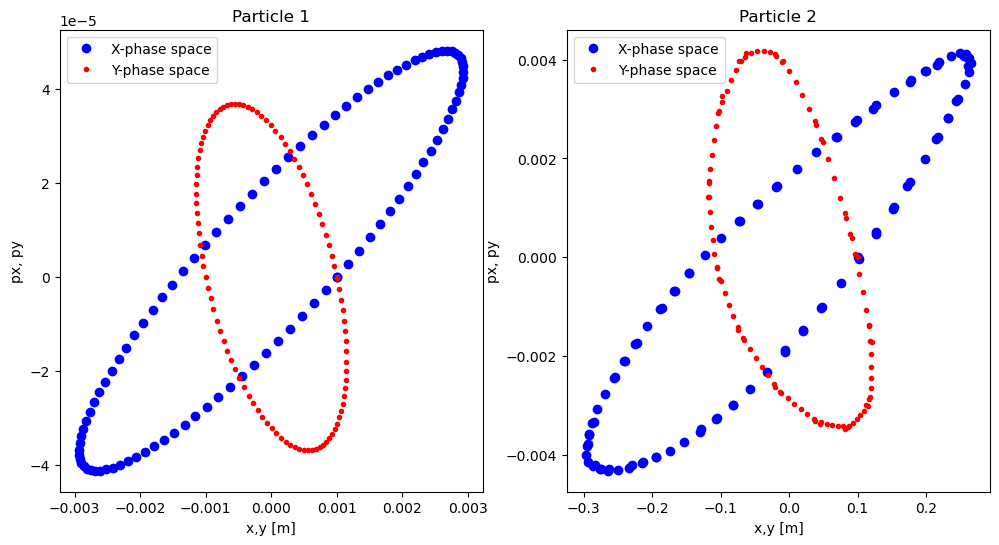

In [29]:
plt.rcParams['figure.dpi'] = 100

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
ax1.plot(optWP_off_momentum_nonlinear_particle_1['x'],optWP_off_momentum_nonlinear_particle_1['px'],'ob',label='X-phase space')
ax1.plot(optWP_off_momentum_nonlinear_particle_1['y'],optWP_off_momentum_nonlinear_particle_1['py'],'.r',label='Y-phase space')
ax1.set_xlabel('x,y [m]')
ax1.set_ylabel('px, py')
ax1.legend()
ax1.set_title('Particle 1')

ax2.plot(optWP_off_momentum_nonlinear_particle_2['x'],optWP_off_momentum_nonlinear_particle_2['px'],'ob',label='X-phase space')
ax2.plot(optWP_off_momentum_nonlinear_particle_2['y'],optWP_off_momentum_nonlinear_particle_2['py'],'.r',label='Y-phase space')
ax2.set_xlabel('x,y [m]')
ax2.set_ylabel('px, py')
ax2.legend()
ax2.set_title('Particle 2')

#### We can again plot the amplitude vs the turn number

Text(0.5, 1.0, 'Particle 2')

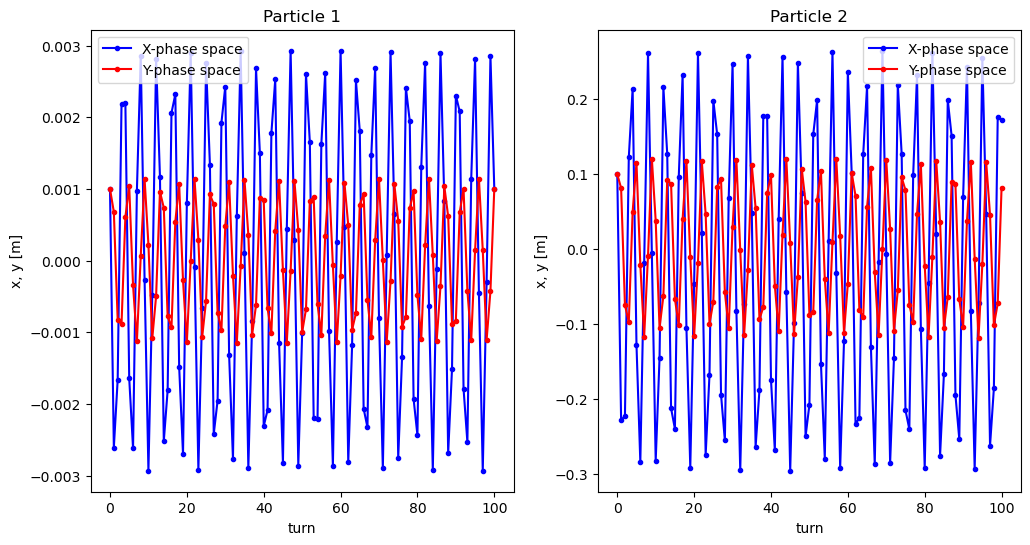

In [30]:
plt.rcParams['figure.dpi'] = 100

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
ax1.plot(optWP_off_momentum_nonlinear_particle_1['turn'],optWP_off_momentum_nonlinear_particle_1['x'],'.-b',label='X-phase space')
ax1.plot(optWP_off_momentum_nonlinear_particle_1['turn'],optWP_off_momentum_nonlinear_particle_1['y'],'.-r',label='Y-phase space')
ax1.set_xlabel('turn')
ax1.set_ylabel('x, y [m]')
ax1.legend()
ax1.set_title('Particle 1')

ax2.plot(optWP_off_momentum_nonlinear_particle_2['turn'],optWP_off_momentum_nonlinear_particle_2['x'],'.-b',label='X-phase space')
ax2.plot(optWP_off_momentum_nonlinear_particle_2['turn'],optWP_off_momentum_nonlinear_particle_2['y'],'.-r',label='Y-phase space')
ax2.set_xlabel('turn')
ax2.set_ylabel('x, y [m]')
ax2.legend()
ax2.set_title('Particle 2')

#### Sextupoles are needed for chromaticity correction...but they introduce non-linear fields which induces non-linear motion. Eventually particle motion becomes unstable and will be lost (dynamic aperture).

#### We can improve the solution by moving far from resonances, thus selecting an optimum WORKING POINT.